In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr

data = pyreadr.read_r ("births2006.smpl.rda")
print (data.keys())

df = data['births2006.smpl']


'Task-1 : The first five records of the dataset'
# df
df.head(5)


odict_keys(['births2006.idx', 'births2006.smpl'])


,DOB_MM,DOB_WK,MAGER,TBO_REC,WTGAIN,SEX,APGAR5,DMEDUC,UPREVIS,ESTGEST,DMETH_REC,DPLURAL,DBWT
0,9,1,25,2,NaN,F,NaN,NULL,10,99,Vaginal,1 Single,3800
1,2,6,28,2,26,M,9,2 years of college,10,37,Vaginal,1 Single,3625
2,2,2,18,2,25,F,9,NULL,14,38,Vaginal,1 Single,3650
3,10,5,21,2,6,M,9,NULL,22,38,Vaginal,1 Single,3045
4,7,7,25,1,36,M,10,2 years of high school,15,40,Vaginal,1 Single,3827


In [294]:
df.isnull().sum()

DOB_MM           0
DOB_WK           0
MAGER            0
TBO_REC       3134
WTGAIN       75856
SEX              0
APGAR5       58231
DMEDUC           0
UPREVIS          0
ESTGEST          0
DMETH_REC        0
DPLURAL          0
DBWT           434
dtype: int64

In [295]:
print (df.columns)

Index(['DOB_MM', 'DOB_WK', 'MAGER', 'TBO_REC', 'WTGAIN', 'SEX', 'APGAR5',
       'DMEDUC', 'UPREVIS', 'ESTGEST', 'DMETH_REC', 'DPLURAL', 'DBWT'],
      dtype='object')


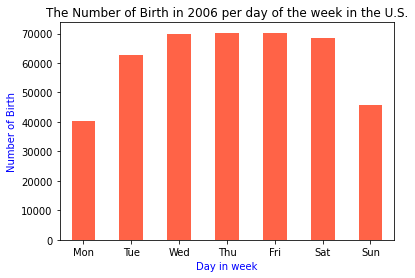

In [296]:
'Task-2 : The Number of Birth in 2006 per day of the week in the U.S.'

dob_wk = df.groupby("DOB_WK").size()

label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

dob_wk.plot(kind = "bar", color = "tomato")

plt.title("The Number of Birth in 2006 per day of the week in the U.S.")
plt.xlabel("Day in week", color = "blue")
plt.ylabel("Number of Birth", color = "blue")
plt.xticks(np.arange(len(label)), label, rotation = 0)
plt.show()


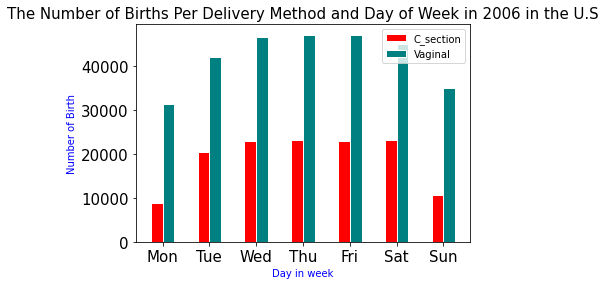

In [297]:
'''
    Task-3: The Number of Birth per Delivery Method and Day of Week in 2006 in the U.S.
        Note : the number of birth per Unknown method is too small compared to others
'''
dmeth_rec = df.groupby(["DMETH_REC","DOB_WK"]).size()
C_sect = dmeth_rec["C-section"]
Unknown = dmeth_rec["Unknown"]
Vaginal = dmeth_rec["Vaginal"]

barWidth = 0.25

r1 = np.arange(len(C_sect))
# r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r1]

plt.bar(r1, C_sect, color = 'red', label='C_section', width=barWidth, edgecolor = 'white')
# plt.bar(r2, Unknown, color = 'blue', label='Unknown', width=barWidth, edgecolor = 'white')
plt.bar(r3, Vaginal, color = 'teal', label='Vaginal', width=barWidth, edgecolor = 'white')

plt.xticks([r + barWidth/2 for r in range(len(C_sect))], label)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Day in week", color = "blue")
plt.ylabel("Number of Birth", color = "blue")
plt.title ("The Number of Births Per Delivery Method and Day of Week in 2006 in the U.S", fontsize = 15)
plt.legend()
plt.show()




In [298]:
'''
 Task-4: The Number of Birth based on Birth Weight and Single or Multiple Birth Using Histogram.
'''
 
dplural = df.groupby(["DPLURAL","DBWT"]).size()
print (dplural)

DPLURAL                 DBWT
1 Single                227     19
                        228      3
                        230      3
                        235      1
                        236      1
                                ..
5 Quintuplet or higher  6988     0
                        7740     0
                        7855     0
                        7980     0
                        8165     0
Length: 22140, dtype: int64


In [299]:
df.groupby(["DPLURAL"]).size()

DPLURAL
1 Single                  412979
2 Twin                     13658
3 Triplet                    642
4 Quadruplet                  39
5 Quintuplet or higher         5
dtype: int64

In [300]:
data = df.groupby(["DPLURAL"])
# for name, group in data:
#     print (name)
#     print (group)
#     print ()

single = data.get_group("1 Single")['DBWT']
twin = data.get_group("2 Twin")['DBWT']
triplet = data.get_group('3 Triplet')['DBWT']
quad = data.get_group('4 Quadruplet')['DBWT']
quin =  data.get_group('5 Quintuplet or higher')['DBWT']


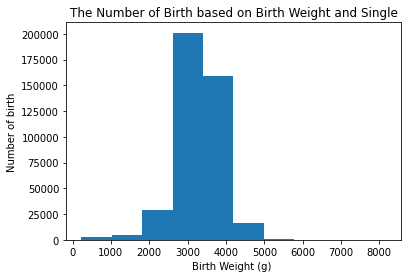

In [317]:
single.plot.hist()
plt.xlabel('Birth Weight (g) ')
plt.ylabel('Number of birth')
plt.title("The Number of Birth based on Birth Weight and Single")
plt.show()

Text(0.5, 1.0, 'The Number of Birth based on Birth Weight and Twin')

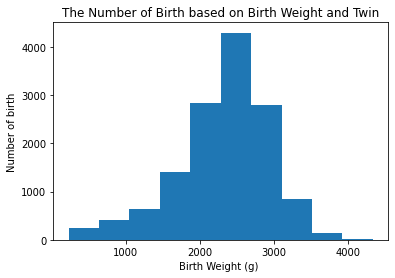

In [318]:
twin.plot.hist()
plt.xlabel('Birth Weight (g) ')
plt.ylabel('Number of birth')
plt.title("The Number of Birth based on Birth Weight and Twin")

Text(0.5, 1.0, 'The Number of Birth based on Birth Weight and Triplet')

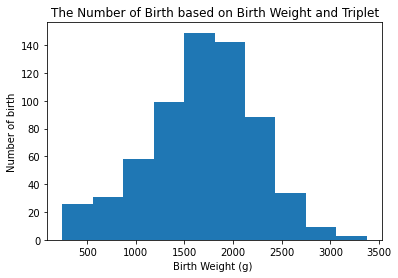

In [319]:
triplet.plot.hist()
plt.xlabel('Birth Weight (g) ')
plt.ylabel('Number of birth')
plt.title("The Number of Birth based on Birth Weight and Triplet")


Text(0.5, 1.0, 'The Number of Birth based on Birth Weight and Quadruplet')

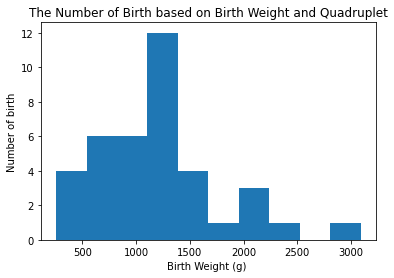

In [320]:
quad.plot.hist()
plt.xlabel('Birth Weight (g) ')
plt.ylabel('Number of birth')
plt.title("The Number of Birth based on Birth Weight and Quadruplet")


Text(0.5, 1.0, 'The Number of Birth based on Birth Weight and Quintuplet or higher')

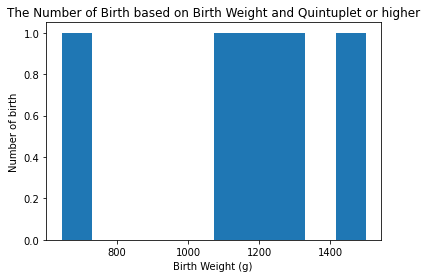

In [321]:
quin.plot.hist()
plt.xlabel('Birth Weight (g) ')
plt.ylabel('Number of birth')
plt.title("The Number of Birth based on Birth Weight and Quintuplet or higher")

In [306]:
# Multi histogram in one 
# sing = single.to_numpy()
# tw = twin.to_numpy()
# tr = triplet.to_numpy()
# qua = quad.to_numpy()
# qui = quin.to_numpy()

# fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows=3, ncols=2)
# n_bins = 10

# ax0.hist(sing, n_bins, density=True, histtype='bar', color= 'teal')
# ax0.set_title('sinlge')

# ax1.hist(tw, n_bins, density=True, histtype='bar', stacked=True)
# ax1.set_title('Twin')

# ax2.hist(tr, n_bins, density=True, histtype='bar', stacked=True)
# ax2.set_title('Triple')

# ax3.hist(qua, n_bins, density=True, histtype='bar', stacked=True)
# ax3.set_title('Quad')

# ax4.hist(qui, n_bins, density=True, histtype='bar', stacked=True)
# ax4.set_title('Quin')

# fig.tight_layout()
# plt.show()


In [307]:
'''
Task-5: The Number of Birth based on Birth Weight and Delivery Method Using Histogram.
'''

task5 = df.groupby(["DMETH_REC"])

t1 = task5.get_group("C-section")['DBWT']
t2 = task5.get_group("Unknown")['DBWT']
t3 = task5.get_group('Vaginal')['DBWT']



Text(0.5, 1.0, 'C-section')

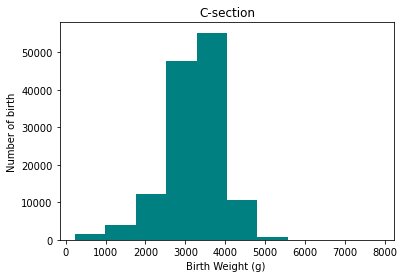

In [308]:
t1.plot.hist(color = "teal")
plt.xlabel('Birth Weight (g) ')
plt.ylabel('Number of birth')
plt.title("C-section")

Text(0.5, 1.0, 'Unknown')

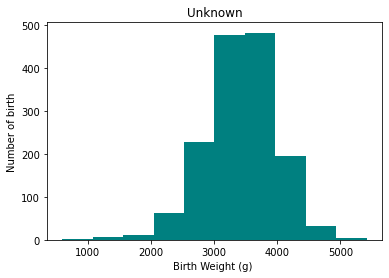

In [309]:
t2.plot.hist(color = 'teal')
plt.xlabel('Birth Weight (g) ')
plt.ylabel('Number of birth')
plt.title("Unknown")

Text(0.5, 1.0, 'Vaginal')

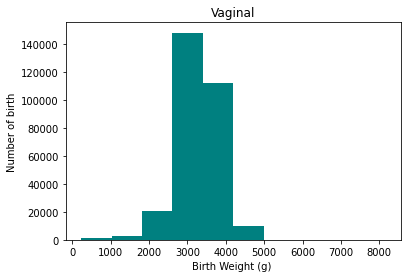

In [310]:
t3.plot.hist(color = 'teal')
plt.xlabel('Birth Weight (g) ')
plt.ylabel('Number of birth')
plt.title("Vaginal")

Text(0, 0.5, 'Birth Weight')

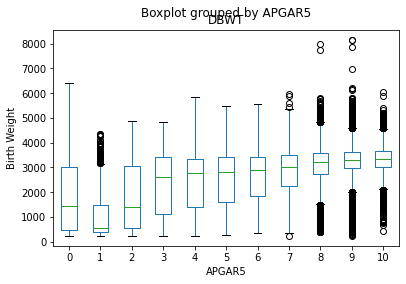

In [311]:
'''
    Task 6 : Box Plot of Birth Weight Per Apgar Score
'''

df.boxplot(by = 'APGAR5', column= 'DBWT', grid= False)
plt.ylabel ('Birth Weight')


Text(0, 0.5, 'Birth Weight')

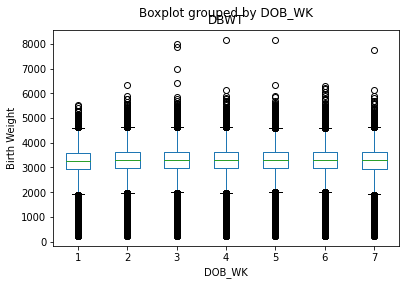

In [312]:
'''
    Task 7 : Box Plot of Birth Weight Per Day of the Week
'''

df.boxplot(by = 'DOB_WK', column= 'DBWT', grid= False)
plt.ylabel ('Birth Weight')

In [313]:
'''
    Task-8: The Average of Birth Weight Per Multiple Births by Gender.
'''

task8 = df.groupby(["SEX", "DPLURAL"])
task8.size()

SEX  DPLURAL               
F    1 Single                  201596
     2 Twin                      6709
     3 Triplet                    327
     4 Quadruplet                  18
     5 Quintuplet or higher         3
M    1 Single                  211383
     2 Twin                      6949
     3 Triplet                    315
     4 Quadruplet                  21
     5 Quintuplet or higher         2
dtype: int64

In [314]:
for name, group in task8:
    print (name)
    # print (group)
    print ()


('F', '1 Single')

('F', '2 Twin')

('F', '3 Triplet')

('F', '4 Quadruplet')

('F', '5 Quintuplet or higher')

('M', '1 Single')

('M', '2 Twin')

('M', '3 Triplet')

('M', '4 Quadruplet')

('M', '5 Quintuplet or higher')



In [315]:
f_single = task8.get_group(('F', '1 Single'))['DBWT'].mean()
f_twin = task8.get_group(('F', '2 Twin'))['DBWT'].mean()
f_triplet = task8.get_group(('F', '3 Triplet'))['DBWT'].mean()
f_quad = task8.get_group(('F', '4 Quadruplet'))['DBWT'].mean()
f_quin = task8.get_group(('F', '5 Quintuplet or higher'))['DBWT'].mean()

m_single = task8.get_group(('M', '1 Single'))['DBWT'].mean()
m_twin = task8.get_group(('M', '2 Twin'))['DBWT'].mean()
m_triplet = task8.get_group(('M', '3 Triplet'))['DBWT'].mean()
m_quad = task8.get_group(('M', '4 Quadruplet'))['DBWT'].mean()
m_quin = task8.get_group(('M', '5 Quintuplet or higher'))['DBWT'].mean()

female = [f_single, f_twin, f_triplet, f_quad, f_quin]
male = [m_single, m_twin, m_triplet, m_quad, m_quin]



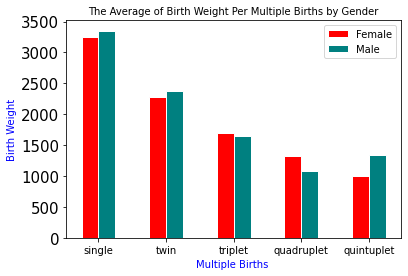

In [316]:
barWidth = 0.25

r1 = np.arange(len(female))
# r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r1]
bars = ('single', 'twin', 'triplet', 'quadruplet', 'quintuplet')

plt.bar(r1, female, color = 'red', label='Female', width=barWidth, edgecolor = 'white')
# plt.bar(r2, Unknown, color = 'blue', label='Unknown', width=barWidth, edgecolor = 'white')
plt.bar(r3, male, color = 'teal', label='Male', width=barWidth, edgecolor = 'white')

plt.xticks([r + barWidth/2 for r in range(len(female))], bars)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Multiple Births ", color = "blue")
plt.ylabel("Birth Weight", color = "blue")
plt.title ("The Average of Birth Weight Per Multiple Births by Gender", fontsize = 10)
plt.legend()
plt.show()



### Task-9 : Discussion

Task2 : The Number of Birth in 2006 per day of the week in the U.S.

 - Số lượng ca sinh trong tuần khá đồng đều, trong đó, từ thứ 4 đến thứ 6, số ca sinh cao tương đương nhau
 - Số ca sinh thấp nhất vào ngày thứ 2
 
Task-3 : The Number of Birth per Delivery Method and Day of Week in 2006 in the U.S.

 - Số ca sinh thường (vaginal) chiếm số lượng nhiều hơn số ca sinh mổ (C-section)
 - Số lượng ca sinh chưa rõ (unknown) trong tuần rất ít, không thể so sánh với hai hình thức còn lại
 - Số lượng ca sinh theo cả hai hình thức trải đều các ngày trong tuần, chênh nhau không nhiều

Task-4: The Number of Birth based on Birth Weight and Single or Multiple Birth Using Histogram.

 - Càng sinh nhiều thì cân nặng khi sinh càng có xu hướng giảm
 - Các ca sinh chủ yếu là sinh đơn (single)
 - Cân nặng khi sinh chủ yếu rơi vào khoảng 3000g-4000g
 
Task-5: The Number of Birth based on Birth Weight and Delivery Method Using Histogram.

 - Các ca sinh theo 3 hình thức dựa theo cân nặng phân phối tương đối giống nhau
 - Cân nặng chủ yếu là khoảng 3000g - 4000g
 
Task 6 : Box Plot of Birth Weight Per Apgar Score

 - Trung vị theo cân nặng của điểm Apgar từ điểm 3 - 10 khá gần nhau, gần 3000
 - Trung vị theo cân nặng của điểm Apgar từ điểm 0 - 2 khá gần nhau, khoảng 1500g
 - Ngoại lệ ở điểm Apgar 8 và 9 cho thấy có những em bé sinh ra nặng hơn 6 cân 
 - Điểm Apgar càng tăng, càng nhiều ngoại lệ
 
Task 7 : Box Plot of Birth Weight Per Day of the Week

 - Cân nặng trung bình của các ngày trong tuần đồng đều nhau
 - Ngoại lệ cho thấy cân nặng của bé sinh ra lớn hơn 6 cân thể hiện ở các ngày từ thứ 3 đến thứ 7
 
Task-8: The Average of Birth Weight Per Multiple Births by Gender.

 - Sinh đơn cho ra bé có cân nặng cao nhất
 - Đối với hình thức sinh 3 và sinh 4, cân nặng trung bình của bé gái nặng hơn bé trai và ngược lại
 - Càng tăng số lượng trong một lần sinh, cân nặng trung bình càng giảm